## Introduction



This notebook is part of the workshop "Mathematics of Deep Learning" run
by Aggregate Intellect Inc. ([https://ai.science](https://ai.science)), and is released
under 'Creative Commons Attribution-NonCommercial-ShareAlike CC
BY-NC-SA" license. This material can be altered and distributed for
non-commercial use with reference to Aggregate Intellect Inc. as the
original owner, and any material generated from it must be released
under similar terms.
([https://creativecommons.org/licenses/by-nc-sa/4.0/](https://creativecommons.org/licenses/by-nc-sa/4.0/))



## Convolution



Experiment with convolutions in 1D by smoothing a top-hat function with
a Hann function.

-   Define a top-hat function that is non-zero in the range of [100:200] - Hint: use np.repeat
-   Define a Hann function between 0 and 50 - Hint: use scipy.signal.hann
-   Apply the Hann function to the top-hat. Normalize it - Hint: use signal.convolve
-   Plot the signal before and after smoothing to see the result.
-   Discuss with your teammates to make sure you understand the results.

In [1]:
from scipy import signal
import numpy as np
import matplotlib.pyplot as plt

sig =  #Define a top-hat function. 
win =   #Define a Hann function between 0 and 50
filtered =   /sum(win) #Apply the Hann function to the top-hat

###### Plot your results



<ipython-input-2-d06e54ae2beb>:13: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


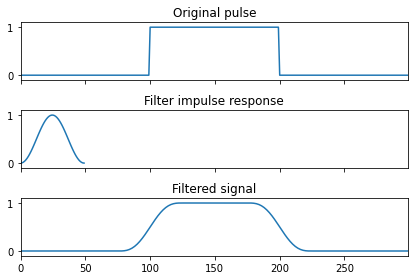

In [2]:
fig, (ax_orig, ax_win, ax_filt) = plt.subplots(3, 1, sharex=True) #Create your axes
ax_orig.plot(sig)
ax_orig.set_title('Original pulse') #Top-hat function is the original signal
ax_orig.margins(0, 0.1)
ax_win.plot(win)
ax_win.set_title('Filter impulse response') #Hann function is the Filter impulse-response
ax_win.margins(0, 0.1)
ax_filt.plot(filtered)
ax_filt.set_title('Filtered signal') #Hann function apply it to top-hat is your filtered signal.
ax_filt.margins(0, 0.1)
fig.tight_layout()
fig.show()

### Application: smoothing/binning noisy functions



In PyTorch:



-   Create a noisy function with mean 0 and variance 1 - Hint: use torch.randn
-   Pick the kernel to be a top-hat function of length L
-   Convolve a noisy function with the kernel
-   Observe how the function is binned using this operation.

In [53]:
import torch

original_signal = #Create noisy function N(0,1) 
kernel = #Pick a kernel
smooth_signal = / kernel.sum() #Use torch.conv1d with padding = 5. 

In [ ]:
#Look the smooth_signal shape and answer why does it have those values.

print(original_signal.shape)
print(kernel.shape)
print(smooth_signal.shape)

###### Note: To plot you need to convert to numpy and flatten:



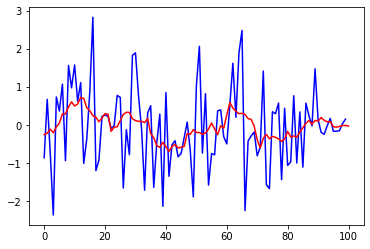

In [54]:
plt.plot(original_signal.numpy().flatten(), label="Original Signal", color='blue')
plt.plot(smooth_signal.numpy().flatten(), label="Smooth Signal", color='red')

### Hands-On: 1D Convolution in PyTorch (optional)



Experiment with 1D conv in PyTorch by recreating this plot to bin a
noisy function.

-   Get creative. Pick your own function.
-   Add noise to it.
-   Pick different kernels, experiment with the width and shape of the
    kernels.



In [ ]:
original_signal = #pick a function
# add noise using torch.randn([1,1,100])
# noisy_signal = original signal + 
kernel = #Kernel with torch.ones
smooth_signal = torch.conv1d(noisy_signal, kernel, padding=5)/kernel.sum() 

Note: Don't forget to plot you need to convert to numpy and flatten:



In [ ]:
plt.plot(original_signal.numpy().flatten(), label="Original Signal")
plt.plot(smooth_signal.numpy().flatten(), label="Smooth Signal")

## Two Dimensional Convolution for Edge Detection



### Convolutions in 2D: A step towards ConvNets



2D Convolution: Detect Edges with the Sobel Operator



In [ ]:
!wget "https://drive.google.com/uc?id=1DeAk2H22KadwmVmLshtbll6K-NkO5Vwb" -O "Veins.png"

In [ ]:
import imageio
from scipy import ndimage #Import Scipy image processing
from scipy import misc #Import miscellaneuous routines
import matplotlib.pyplot as plt

#replace the file address with your own image file address
image = imageio.imread("Veins.png", as_gray=True)

fig = plt.figure(); plt.gray()  # show the filtered result in grayscale
ax1 = fig.add_subplot(121)  # left side
ax2 = fig.add_subplot(122)  # right side

result = ndimage.sobel(image) #Calculate the Sobel filter 

ax1.imshow(image)
ax2.imshow(result)
plt.show()

#### Exercise: 

#### 1) Find edges in the x-direction using Sobel Operator

Remember that Sobel_X kernel is defined as: 

\begin{equation*}
G_{x} = 
\begin{bmatrix}
-1 & 0 & +1 \\
-2 & 0 & +2 \\
-1 & 0 & +1
\end{bmatrix}
\end{equation*}

Experiment with convolutions in 2D to detect edges in an image

1.  Read the image and convert it to grey.
2.  Define the kernel
3.  Apply the kernel to the image using scipy.signal.convolve2d - Hint: (boundary='symm', mode='same')
4.  Plot the results

Try Sobel Kernel as well as Scharr Kernel. See the difference in the
results? Note for TA's: here is a sample solution.


In [ ]:
#replace the file address with your own image file address
image = imageio.imread("Veins.png", as_gray=True)

sobel_x = #Define the Sobel_x Kernel

result = #Apply the kerne to the image using scipy.signal.convolve2d

Plot results



In [ ]:
fig, (ax_orig, ax_mag) = plt.subplots(1, 2)
ax_orig.imshow(image, cmap='gray')
ax_orig.set_title('Original')
ax_orig.set_axis_off()
ax_mag.imshow(np.absolute(result), cmap='gray')
ax_mag.set_title('Sobel Applied')
ax_mag.set_axis_off()
fig.show()

#### Exercise: 

#### 2) Perform Sobel Operator for y axis

How should the Sobel Y Operator look like?

In [ ]:
#replace the file address with your own image file address

image = imageio.imread("Veins.png", as_gray=True)

sobel_y =  #Define the Sobel_y Kernel

sobel = #Apply the kernel to the image using scipy.signal.convolve2d

Plot results



In [ ]:
fig, (ax_orig, ax_mag) = plt.subplots(1, 2)
ax_orig.imshow(image, cmap='gray')
ax_orig.set_title('Original')
ax_orig.set_axis_off()
ax_mag.imshow(np.absolute(result), cmap='gray')
ax_mag.set_title('Sobel Applied')
ax_mag.set_axis_off()
fig.show()

#### Exercise: 

#### 3) Combine x and y results to get a final result



In [ ]:
import imageio
from scipy import signal
from scipy import misc

#replace the file address with your own image file address
image = imageio.imread("Veins.png", as_gray=True)

sobel_y = np.array([[ -1j, -2j,  -1j], [0, 0, 0], [ 1j, 2j,  1j]])  
sobel_x = np.array([[ -1, 0,  +1], [-2, 0, +2], [ -1, 0,  +1]])

result = signal.convolve2d(image, sobel_x+sobel_y, boundary='symm', mode='same')

Plot results



In [ ]:
import matplotlib.pyplot as plt
fig, (ax_orig, ax_mag) = plt.subplots(1, 2)
ax_orig.imshow(image, cmap='gray')
ax_orig.set_title('Original')
ax_orig.set_axis_off()
ax_mag.imshow(np.absolute(result), cmap='gray')
ax_mag.set_title('Sobel Applied')
ax_mag.set_axis_off()
fig.show()

### 2D Convolution: Detect Edges with Scharr Operator

Scharr Operator tries to achieve the perfect rotational symmetry with: 

\begin{equation*}
G_{x} = 
\begin{bmatrix}
-3 & 0 & +3 \\
-10 & 0 & +10 \\
-3 & 0 & +3
\end{bmatrix} 
\end{equation*}


\begin{equation*}
G_{y} = 
\begin{bmatrix}
-3 & -10 & -3 \\
0 & 0 & 0 \\
-3 & -10 & -3
\end{bmatrix}
\end{equation*}

In [ ]:
image = imageio.imread("Veins.png", as_gray=True)

scharr =  # Gx + j*Gy (as a complex representation)

grad =#signal.convolve2d

Plot results



In [ ]:
fig, (ax_orig, ax_mag) = plt.subplots(1, 2)
ax_orig.imshow(image, cmap='gray')
ax_orig.set_title('Original')
ax_orig.set_axis_off()
ax_mag.imshow(np.absolute(grad), cmap='gray')
ax_mag.set_title('Gradient magnitude')
ax_mag.set_axis_off()
fig.show()

### Exercise: Smooth an image with a 2D uniform kernel



In [ ]:
smoothing = #Uniform function of ones
result = #signal.convolve2d

Plot results



In [ ]:
fig, (ax_orig, ax_mag) = plt.subplots(1, 2)
ax_orig.imshow(image, cmap='gray')
ax_orig.set_title('Original')
ax_orig.set_axis_off()
ax_mag.imshow(np.absolute(result), cmap='gray')
ax_mag.set_title('Smooth')
ax_mag.set_axis_off()
fig.show()

## Hands-on Challenge



We are going to continue with our code from last week, except there will be a few changes:

-   We are exchanging the output vector of a layer with an input vector instead. This will make the code a little cleaner
-   Layers will now be subclasses of the *layer* super class
-   The name will now be changed to *FFNN* for *FeedForward Neural Network*, since we are expanding on what our network can do.

This way our FFNN package will be like a "mini pytorch", and our training code will be similar to how pytorch is used. Here is the complete code for our neural network class:

In [ ]:
class FFNN:
    def __init__(self):
        self.net = []
        self.output = None

    def forward(self, x):
        for layer in self.net:
            x = layer.forward(x)
        self.output = x
        return x

    def backward(self, error):
        for layer in reversed(self.net):
            error = layer.backward(error)

    def zero_grad(self):
        for layer in self.net:
            layer.zero_grad()

That is all there is to our network model. Nice and simple. All the rest of the work is done by the layers. We create an instance of a *FFNN* as before by appending layers to *self.net* and calling 
`model = FFNN()`

Here is the *layer* superclass

In [ ]:
class layer:
    def __init__(self, node_dim):
        """
        This init should be called via super() with the number
        of nodes as an argument.
        """
        self.input = np.zeros(node_dim)
        self.input_grad = np.zeros(node_dim)
        self.params = False

    def forward(self, x):
        self.input = x
        return x

    def backward(self):
        pass

    def parameters(self):
        pass

    def zero_grad(self):
        self.input_grad.fill(0.)

For any layer you are responsible for:

1.  initializing any additional parameters in `__init__()`. If you do, set the `self.params` flag to `True`.
2.  implementing the `forward` method.
3.  implementing the `backward` and, if applicable, `parameters` methods.

Step #3 can be ignored for this week, it will be needed next week when we will implement gradient descent. 

This is what your layers should look like:

In [ ]:
class mylayer(layer):
    def __init__(self, my_args, node_dim):
        super( mylayer , self).__init__(node_dim)
        # if there are parameters, instantiate here and set 
        # self.params = True

    def forward(self, x):
        self.input = x
        return # your results

### Challenge for the Week



Implement a 2D convolution layer. There is more than one way to calculate convolutions, but we are only asking for the most straight-forward way involving nested `for` loops. 
(Aside: Computing convolutions this way is slow, and that is not how it is implemented by current frameworks. However creating a fast implementation is beyond the scope of this workshop.) 

Here is a code snippet to get you started

In [ ]:
#You only need layer (Base-Parent Class) and the class below to define the Conv2D layer. 

class conv2d(layer):
    def __init__(self, in_c, out_c, kernel_size, stride=1, padding=0, bias=True):
        super(conv2d, self).__init__(out_c)
        self.params = True
        self.bias = bias
        self.stride = stride
        self.padding = padding

        self.w = # kernels (aka weights) tensor 

        if bias:
            self.b = # bias tensor 

    def forward(self, x):
        self.input = x

        # calculate traversal using size of: x, kernel, stride, padding

        for : # traverse 2D input vertically
            for : # traverse input horizontally
                # compute dot product(s)

        return result

#### Optional Challenges:



Try implementing layers for *dropout* and *pooling*.



### Look ahead



If you choose to jump ahead and work on step #3, this is what you need to know:

1.  the backward pass computes the gradients for the `self.input` vector and any additional parameters. This involves implementing the relevant derivates.
2.  If this layer has parameters, the `parameters` method must return an iterable over all of them.
3.  The parameter tensors (if any) will now need corresponding gradient tensors of the same shape.

Here is how your layers will need to look:

In [ ]:
class my_layer(layer):
    def __init__(self, node_dim):
        super(mylayer, self).__init__(node_dim)
        # if there are parameters: 

        # self.params = True

        # instantiate parameters and also include gradient tensors of the same shape, ie.
        # self.parameter = np.array((some shape))
        # self.parameter_grad = np.array((same shape))

    def forward(self, x):
        self.input = x
        return # your results

    def backward(self, error):
        self.input_grad = # compute the gradient of 'x', the layers input 
        # compute any other gradients
        return self.input_grad

    def parameters(self):
        # bundle parameters and their gradients together and return an iterable over them. 
        # for example:
        return zip([self.parameterA, self.parameterA_grad], [self.parameterB, self.parameterB_grad])

This is a 'lite' version of pytorch. We don't get the advantage of autograd and we are not bothering with a separate *tensor* class. 

The activation layers: *relu*, *sigmoid*, *tanh* are pretty easy to implement, I recommend starting with them.

